In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import pandas as pd
import sys
from tqdm import tqdm
import seaborn as sns
import random
from statistics import mode

In [2]:
sys.path.append('/content/drive/MyDrive/Machine_Learning')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def cargar_df():
    path_ = input('Ingresar ruta de acceso del archivo') 
    sep_ = input('Ingresar caracter de separación:')
    df_load = pd.read_csv(path_, sep=sep_)
    return df_load

In [5]:
#/content/drive/MyDrive/Machine_Learning/Tarea01/heart_2020_cleaned (1).csv
#/content/drive/MyDrive/Machine_Learning/Tarea01/codificado_noindex (1).csv
#/content/drive/MyDrive/Machine_Learning/HeartDisease.csv
df = cargar_df()

Ingresar ruta de acceso del archivo/content/drive/MyDrive/Machine_Learning/Tarea01/heart_2020_cleaned (1).csv
Ingresar caracter de separación:,


In [6]:
def classes(df_,atributo_d):
  clases = df[atributo_d]                #extrae columna de atributo de decisión
  clases_valores = clases.value_counts() #extrae las clases y la cantidad de cada una
  num_clases = len(clases_valores)       #cuántas clases tiene
  clases_nombres = list(clases_valores.index)        #nombre de las clases

  return clases_valores, num_clases, clases_nombres

In [7]:
c_valores,n_clases,name_clases = classes(df,'HeartDisease')

In [8]:
def Numero_atributos(df_na):
    num_atributos_ = df_na.shape[1]    #número de columnas
    atributos_ = list(df_na.columns)   #extrae columnas-->lista

    print(f'El dataset tiene {num_atributos_} atributos:')
    
   # for i in range(num_atributos_):   
    #    print(f'{i+1}.- {atributos_[i]} ')
    return num_atributos_, atributos_

In [9]:
n_atributos, atributos = Numero_atributos(df)

El dataset tiene 18 atributos:


In [10]:
def Observaciones(df_o, atributo_o):
    atributo_selec = df[atributo_o]
    obs_ = df[atributo_o].value_counts()
    cantidad_obs = list(obs_)
    nombre_obs = list(obs_.index)
   
    return nombre_obs, cantidad_obs

In [86]:
def Numero_instancias(df_ni):
    num_instancias_ = df_ni.shape[0]
   # print(f'El dataset tiene {num_instancias_} instancias')
    return num_instancias_

In [ ]:
def Observaciones(df_o, atributo_o):
    atributo_selec = df[atributo_o]
    obs_ = df[atributo_o].value_counts()
    cantidad_obs = list(obs_)
    nombre_obs = list(obs_.index)
   
    return nombre_obs, cantidad_obs

In [202]:
def entropy(df_e,atributo_d):
  total_instancias = Numero_instancias(df_e)
  c_valores,n_clases,name_clases = classes(df_e,atributo_d)
  
  entropy_=0
  for i,k in enumerate(c_valores):
   
    entropy_ -= (k/total_instancias)*np.log2(k/total_instancias)
    
  return entropy_

In [203]:
def ganancia_atributo(df_g,atributo_d):

  g = entropy(df_g,atributo_d)
  ganancias_por_atributo = {}
  atributos = df_g.columns #BMI, Race, Sex,...
  c_valores,n_clases,name_clases = classes(df_g,atributo_d)
#  print(c_valores,n_clases,name_clases)
  total_instancias = Numero_instancias(df_g)
  
  for c in atributos:         #Race
    ganancias_por_atributo[c] = 0
    name_obs,num_obs = Observaciones(df_g,c)
    
    for o in name_obs:       #White
      #df[df['HeartDisease']=='Yes'].loc[df['Race']=='White']
      obs_clas = df_g[atributo_d].loc[df_g[c]== o] 
      entropy_atributo_clase = entropy(obs_clas,atributo_d)
      coinciden = len(obs_clas)
      ganancias_por_atributo[c] += (coinciden/total_instancias)*(entropy_atributo_clase)
  ganancias_por_atributo[c] = g - ganancias_por_atributo[c]

  return ganancias_por_atributo

In [128]:
gains = ganancia_atributo(df,'HeartDisease')

Se han truncado las últimas 5000 líneas del flujo de salida.
entropia -5713199.480396642
inst 319795
1
div 3.1270032364483495e-06
inst 319795
32.29
c_valores No     292422
Yes     27373
Name: HeartDisease, dtype: int64
div1 292422.0
entropia -5309708.706274801
div1 27373.0
entropia -5713199.480396642
inst 319795
1
div 3.1270032364483495e-06
inst 319795
37.72
c_valores No     292422
Yes     27373
Name: HeartDisease, dtype: int64
div1 292422.0
entropia -5309708.706274801
div1 27373.0
entropia -5713199.480396642
inst 319795
1
div 3.1270032364483495e-06
inst 319795
56.23
c_valores No     292422
Yes     27373
Name: HeartDisease, dtype: int64
div1 292422.0
entropia -5309708.706274801
div1 27373.0
entropia -5713199.480396642
inst 319795
1
div 3.1270032364483495e-06
inst 319795
34.55
c_valores No     292422
Yes     27373
Name: HeartDisease, dtype: int64
div1 292422.0
entropia -5309708.706274801
div1 27373.0
entropia -5713199.480396642
inst 319795
1
div 3.1270032364483495e-06
inst 319795
43.06


In [143]:
def convert_dic_to_df(dict_,columns_):
  df_name = pd.DataFrame([[key, dict_[key]] for key in dict_.keys()], columns=columns_)
  df_name
  return df_name

In [201]:
gains_df = convert_dic_to_df(gains,['Atributo', 'Ganancia'])

In [197]:
def nodo_raiz(ganancias_):
  ganancias_.sort_values('Ganancia',ascending=False,inplace=True) #ordenar(opcional)
  best_ganancia = ganancias_['Ganancia'].max() #mejor ganancia
  gmax = ganancias_['Ganancia'].idxmax()  #índice_max
  name_root = ganancias_['Atributo'][gmax] #nombre del atributo
  return name_root, best_ganancia

In [198]:
name_root, best_ganancia = nodo_raiz(gains_df)

In [210]:
name_root

'SkinCancer'

In [ ]:
df['HeartDisease'].loc[df['Race']=='White']

In [207]:
df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [215]:
def nodos_intermedios(df_n,atri_raiz):
    nodes = []
    atri_dec = df_n[atri_raiz].unique()
    for node in atri_dec:
      n = df_n.loc[df_n[atri_raiz] == node]
      nodes.append(n)
    return nodes, atri_dec


In [216]:
nodos_dos,atributos_decision = nodos_intermedios(df,name_root)

In [217]:
atributos_decision

array(['Yes', 'No'], dtype=object)

In [221]:
#nodos_dos[1]--Yes
#nodos_dos[0]--No

In [223]:
def hojas():
  
  ganancias_.sort_values('Ganancia',ascending=False,inplace=True) #ordenar(opcional)
  best_ganancia = ganancias_['Ganancia'].max() #mejor ganancia
  gmax = ganancias_['Ganancia'].idxmax()  #índice_max
  name_root = ganancias_['Atributo'][gmax] #nombre del atributo
  return name_root, best_ganancia
for i,k in enumerate(nodos_dos):
  print(i)

0
1


In [56]:
for i in range(2):
  ganancias_por_atributo[i] = i+1

In [60]:
ganancias_por_atributo[1]-1

1

In [34]:
for c in atributos:
    name_obs,num_obs = Observaciones(df,c)
    print(name_obs,num_obs)
    
for i,j in zip(name_obs,num_obs):
  print(i)
  print(j)

['No', 'Yes'] [292422, 27373]
[26.63, 27.46, 27.44, 24.41, 27.12, 25.1, 28.7, 29.53, 32.28, 29.29, 25.84, 25.09, 25.75, 28.34, 24.21, 24.96, 29.05, 26.61, 28.19, 25.06, 25.82, 26.58, 28.89, 25.83, 24.39, 24.03, 27.37, 30.41, 24.33, 31.32, 28.25, 26.57, 23.49, 27.26, 24.8, 22.31, 27.89, 25.85, 23.3, 29.95, 23.63, 24.37, 26.45, 22.6, 30.9, 29.84, 22.96, 25.77, 25.61, 29.18, 22.81, 28.29, 21.63, 28.06, 23.78, 34.33, 29.76, 33.28, 30.13, 26.54, 29.26, 22.46, 25.11, 26.5, 28.32, 23.17, 23.75, 23.03, 31.57, 30.11, 27.41, 20.98, 28.48, 21.95, 27.98, 30.67, 21.93, 24.89, 31.89, 33.47, 23.4, 31.19, 21.79, 20.6, 22.15, 23.73, 24.69, 27.32, 26.39, 33.91, 23.67, 24.13, 21.46, 30.68, 35.43, 25.69, 28.13, 32.92, 23.91, 25.8, 32.61, 23.06, 31.01, 25.02, 32.55, 23.71, 31.62, 21.26, 24.28, 31.09, 32.49, 25.79, 31.75, 22.14, 21.29, 22.71, 33.45, 31.25, 22.86, 31.93, 33.0, 30.04, 36.58, 31.0, 21.52, 28.97, 26.52, 29.12, 25.39, 23.57, 22.67, 25.68, 27.8, 19.37, 32.08, 21.14, 27.34, 22.32, 35.87, 29.86, 20

In [22]:
for c in df.columns:
  print(c)
  r = df['HeartDisease'].unique()
  for i in r:
    print(i)

HeartDisease
No
Yes
BMI
No
Yes
Smoking
No
Yes
AlcoholDrinking
No
Yes
Stroke
No
Yes
PhysicalHealth
No
Yes
MentalHealth
No
Yes
DiffWalking
No
Yes
Sex
No
Yes
AgeCategory
No
Yes
Race
No
Yes
Diabetic
No
Yes
PhysicalActivity
No
Yes
GenHealth
No
Yes
SleepTime
No
Yes
Asthma
No
Yes
KidneyDisease
No
Yes
SkinCancer
No
Yes


6


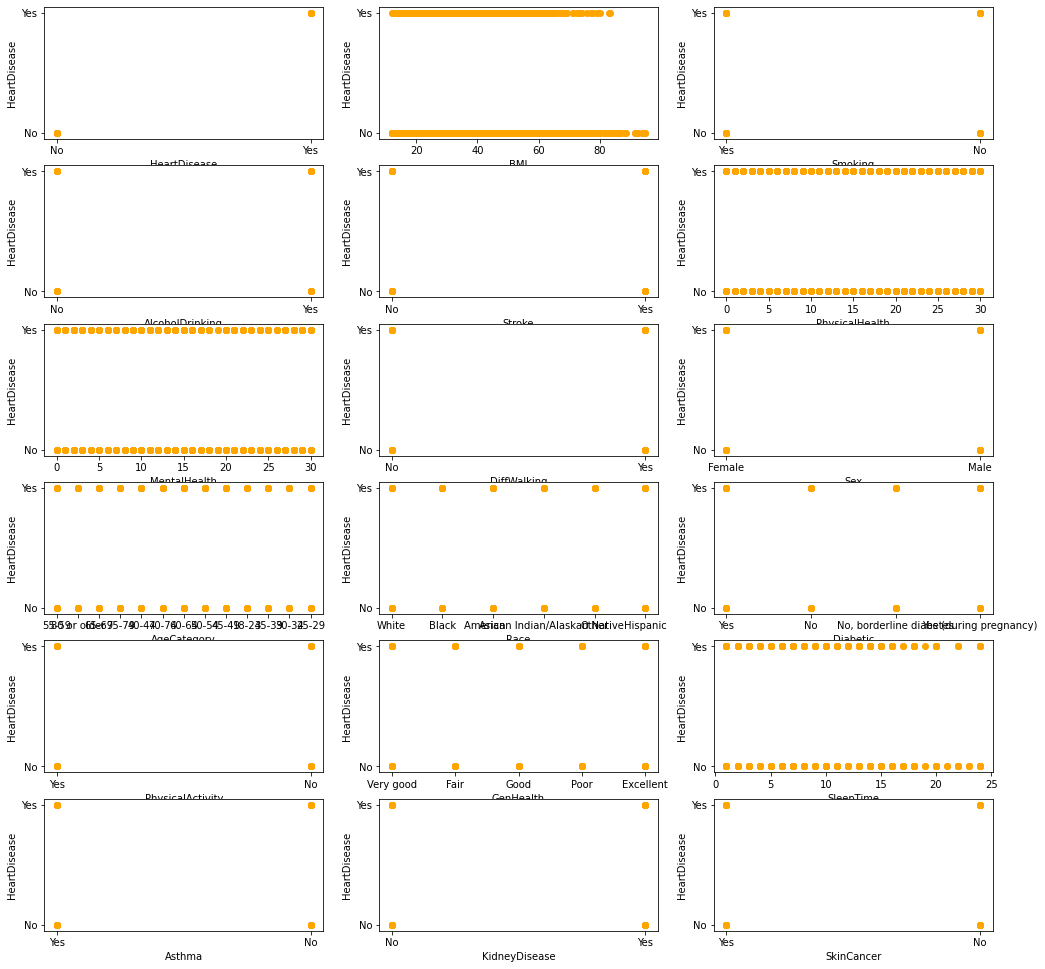

In [31]:
Distribucion(df,'HeartDisease')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

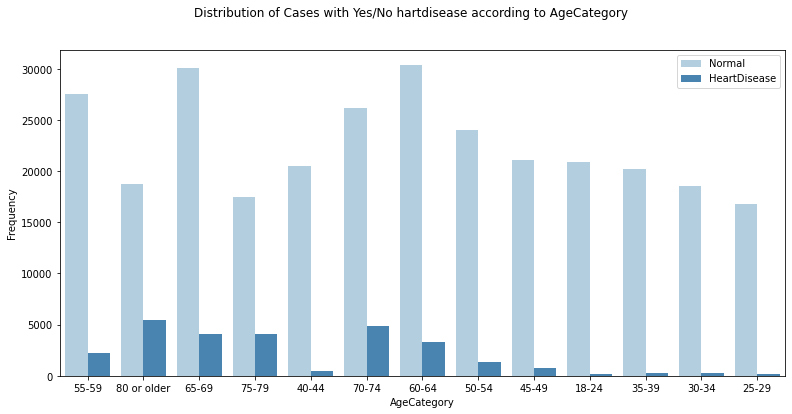

In [37]:
#fig, ax = plt.subplots(figsize = (14,6))
plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'Blues')
plt.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()